In [46]:
!pip install rdkit


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### ★1차 학습목표 파이썬으로 약물 분석 패키지 "rdkit"을 활용할 수 있다. ★

#### 공식문서 :  https://www.rdkit.org/docs/

RDKit은 cheminformatics와 머신러닝을 위한 여러 기능을 포함하고 있는 파이썬 package입니다.

분자구조 표현 형식간 전환, fingerprint generation, similarity caculation부터

다양한 Descriptor calculation 함수들을 내장하고 있습니다.

또한 머신러닝과 data sciencef를 위해 많이 사용되는 numpy, pandas, sklearn과 같은

다른 python package들과의 연계를 통해 분자나 화학반응을 prediction하는 모델 구축이 가능

#### Draw a molecule with atom index numbers.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

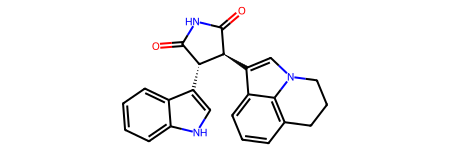

In [3]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

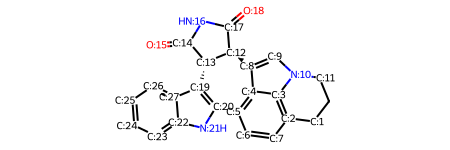

In [4]:
# With atom index
mol_with_atom_index(mol)

#### Draw a molecule with a calculation value displayed (e.g., Gasteiger Charge)

In [16]:
from rdkit.Chem.Draw import IPythonConsole

In [11]:
from rdkit.Chem import AllChem
IPythonConsole.molSize = 250,250

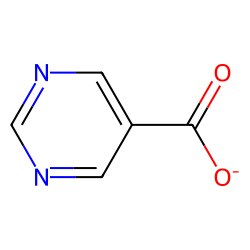

In [25]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

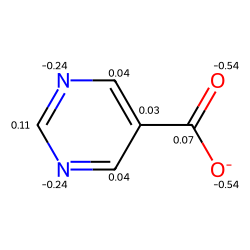

In [26]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

#### Draw a molecule with stereochemistry annotations displayed.

In [40]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

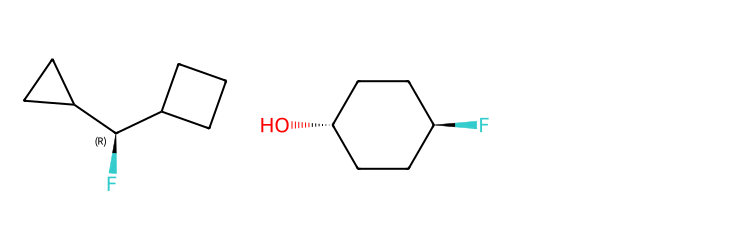

In [41]:
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')

Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

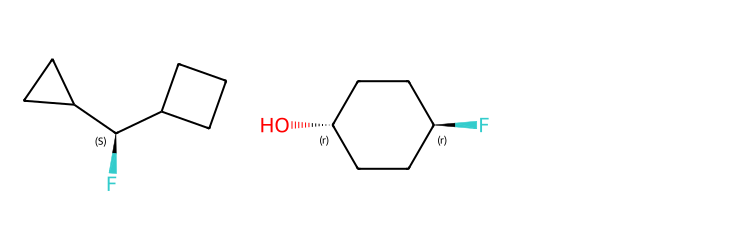

In [42]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

#### Draw a molecule with a substructure highlight

In [44]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


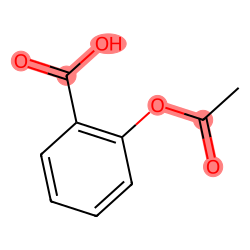

In [45]:
m

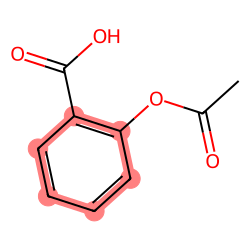

In [46]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,1,2,6,11,12]
m

#### Highlight molecule differences based on maximum common substructure

In [47]:
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20

In [48]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

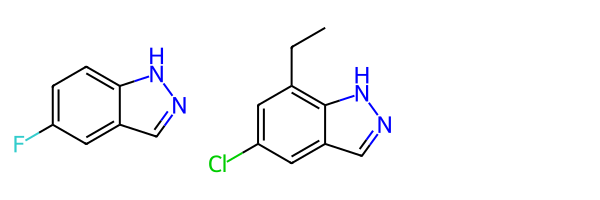

In [49]:
Draw.MolsToGridImage([mol1, mol2])

In [50]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

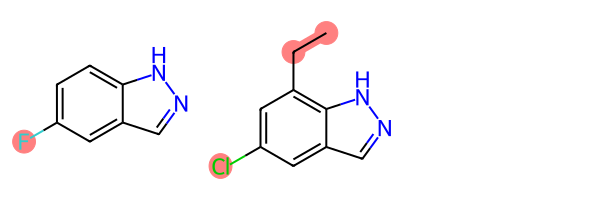

In [51]:
view_difference(mol1,mol2)